In [1]:
import cdsodatacli.query as qr
import datetime
import requests
import pandas as pd
import argparse
from shapely.geometry import GeometryCollection, LineString, Point, Polygon, MultiPolygon
import geopandas as gpd
import shapely
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pytz
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import warnings
import logging 

In [2]:
from importlib import reload
reload(logging)
logging.basicConfig(level=logging.DEBUG)

In [3]:
gdf = gpd.GeoDataFrame({
    "start_datetime": [datetime.datetime(2021,2,26,23)],
    "end_datetime"  : [datetime.datetime(2023,2,27,0)],
    "collection"    : ['SENTINEL-1'],
    "name"          : [None],
    "sensormode"    : ['IW'],
    "producttype"   : ['SLC'],
    "Attributes"    : [None],
    "geometry"      : [shapely.wkt.loads("POINT (149.200 -15.800)")],
})

In [4]:
collect = qr.fetch_data(gdf)
collect

DEBUG:root:normalize_gdf processing time:0.3190617561340332s
DEBUG:root:Length of input:105
DEBUG:root:creat_urls processing time:0.01477956771850586s
100%|█████████████████████████████████████████| 105/105 [00:01<00:00, 56.41it/s]
INFO:root:No data found.


In [4]:
gdf2 = gpd.GeoDataFrame({
        "start_datetime" : [ datetime.datetime(2021,10,2,0) ,  datetime.datetime(2021,10,13,0) ],
        "end_datetime"   : [ datetime.datetime(2021,10,2,21),  datetime.datetime(2022,10,13,18) ],
        "geometry"   : [ shapely.wkt.loads("POINT (-7.5 53)"),  shapely.wkt.loads("POLYGON ((-12 35, -5 35, -5 45, -12 45, -12 35))")],
        "collection"  : [ "SENTINEL-1", "SENTINEL-2"],
        "name"        : [ None, None],
        "sensormode"  : [ None, None],
        "producttype" : [ None, None],
        "Attributes"  : [ None, None],
    })

DEBUG:root:normalize_gdf processing time:0.1629476547241211s
DEBUG:root:Length of input:54
DEBUG:root:creat_urls processing time:0.008959293365478516s
100%|███████████████████████████████████████████| 54/54 [00:02<00:00, 24.22it/s]
DEBUG:root:remove_duplicates time: 0.07453060150146484s
DEBUG:root:multi_to_poly processing time: 0.4207115173339844s
/home1/datahome/jrmiadan/git/cdsodatacli/cdsodatacli/query.py:382: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  earth = GeometryCollection(list(gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).geometry)).buffer(0)
DEBUG:root:sea_percent processing time:5.044294357299805s


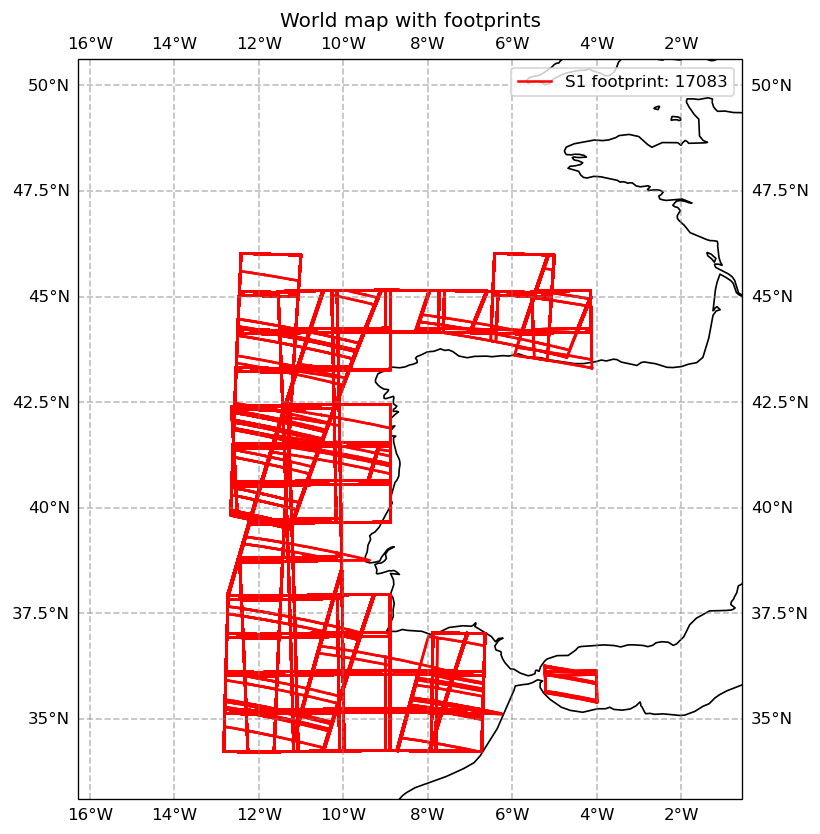

DEBUG:root:fig processing time:9.735842227935791s


,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint,Attributes,input_index,geometry,sea_percent
589,application/octet-stream,90d7f8c9-f80f-4950-87ef-8c566509631a,S2B_MSIL2A_20211225T112359_N0500_R037_T29SPA_2...,application/octet-stream,514422955.0,2023-01-24T18:18:44.188Z,2023-07-17T14:36:51.976Z,2023-07-17T14:37:05.944Z,True,,/eodata/Sentinel-2/MSI/L2A_N0500/2021/12/25/S2...,"[{'Value': '4ea1e351dc3203eb0967244f5b4d12ac',...","{'Start': '2021-12-25T11:23:59.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-7.0575833867275...,"{'type': 'Polygon', 'coordinates': [[[-7.05758...","[{'@odata.type': '#OData.CSC.StringAttribute',...",1,"POLYGON ((-7.05758 37.02925, -7.87551 37.04125...",94.611425
823,application/octet-stream,d235d82c-cf73-52aa-afad-34e7d16a4fbb,S2B_MSIL1C_20211111T114349_N0500_R123_T28TGQ_2...,application/octet-stream,652360321.0,2023-02-05T21:18:54.250Z,2023-02-09T09:01:27.501Z,2023-07-17T14:16:31.998Z,True,,/eodata/Sentinel-2/MSI/L1C_N0500/2021/11/11/S2...,"[{'Value': '903878413f9f06caa1c18397eb383c4f',...","{'Start': '2021-11-11T11:43:49.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-12.457367 45.12...,"{'type': 'Polygon', 'coordinates': [[[-12.4573...","[{'@odata.type': '#OData.CSC.StringAttribute',...",1,"POLYGON ((-12.45737 45.12552, -12.50015 44.138...",100.000000
555,application/octet-stream,02ff45d0-0b62-4591-9f43-a69cd017d7ca,S2A_MSIL1C_20211024T113321_N0500_R080_T29TME_2...,application/octet-stream,543702045.0,2023-03-14T12:15:12.803Z,2023-03-15T08:42:52.394Z,2023-03-15T12:10:38.962Z,True,,/eodata/Sentinel-2/MSI/L1C_N0500/2021/10/24/S2...,[],"{'Start': '2021-10-24T11:33:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-10.1831665 40.6...,"{'type': 'Polygon', 'coordinates': [[[-10.1831...","[{'@odata.type': '#OData.CSC.StringAttribute',...",1,"POLYGON ((-10.18317 40.64479, -10.16614 39.655...",93.432558
258,application/octet-stream,4250a761-c365-4358-a3af-45f1397d2cfd,S2B_MSIL2A_20211029T113319_N0500_R080_T29SKA_2...,application/octet-stream,905900896.0,2023-03-15T03:47:55.548Z,2023-03-15T09:04:12.349Z,2023-03-15T09:04:12.349Z,True,,/eodata/Sentinel-2/MSI/L2A_N0500/2021/10/29/S2...,[{}],"{'Start': '2021-10-29T11:33:19.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-12.371307 36.99...,"{'type': 'Polygon', 'coordinates': [[[-12.3713...","[{'@odata.type': '#OData.CSC.StringAttribute',...",1,"POLYGON ((-12.37131 36.99867, -12.32870 36.010...",100.000000
276,application/octet-stream,863f1b4c-3a48-487a-97d6-06517ada2f31,S2B_MSIL2A_20211029T113319_N0500_R080_T28SGE_2...,application/octet-stream,871849879.0,2023-03-15T03:47:55.442Z,2023-03-15T08:57:36.006Z,2023-03-15T08:57:36.006Z,True,,/eodata/Sentinel-2/MSI/L2A_N0500/2021/10/29/S2...,[{}],"{'Start': '2021-10-29T11:33:19.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-12.778046 36.12...,"{'type': 'Polygon', 'coordinates': [[[-12.7780...","[{'@odata.type': '#OData.CSC.StringAttribute',...",1,"POLYGON ((-12.77805 36.12428, -12.80527 35.135...",100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,application/octet-stream,80fca53f-abd0-5c71-bd6a-6546027e5608,S2B_MSIL1C_20211013T110919_N0301_R137_T30TUQ_2...,application/octet-stream,0.0,2021-10-13T13:55:09.225Z,2021-10-13T14:22:48.976Z,2021-10-13T14:22:48.976Z,True,,/eodata/Sentinel-2/MSI/L1C/2021/10/13/S2B_MSIL...,[],"{'Start': '2021-10-13T11:09:19.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-5.532837 44.887...,"{'type': 'Polygon', 'coordinates': [[[-5.53283...","[{'@odata.type': '#OData.CSC.StringAttribute',...",1,"POLYGON ((-5.53284 44.88752, -5.49118 45.01064...",100.000000
367,application/octet-stream,ed5bc9dd-9cfd-53d5-87e2-75cc189acbc5,S2B_MSIL1C_20211013T110919_N0301_R137_T29SPA_2...,application/octet-stream,0.0,2021-10-13T13:51:01.564Z,2021-10-13T14:17:56.452Z,2021-10-13T14:17:56.452Z,True,,/eodata/Sentinel-2/MSI/L1C/2021/10/1

In [6]:
collected = qr.fetch_data(gdf2, min_sea_percent=90, figure=True, cache_dir='new_cache')
collected

In [4]:
qr.fetch_data(max_cloud_percent=40,start_datetime='2022-01-01 00:00:00', end_datetime='2022-01-01 01:00:00')

DEBUG:root:normalize_gdf processing time:0.004816532135009766s
DEBUG:root:creat_urls processing time:0.0002377033233642578s
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 28.28it/s]
DEBUG:root:remove_duplicates time: 0.0013492107391357422s


,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint,Attributes,input_index
0,application/octet-stream,fa29e22b-65e9-4a8b-939f-87450e917169,S3B_OPER_AUX_GNSSRD_POD__20220108T025408_V2021...,application/octet-stream,25125119,2022-01-08T03:04:12.272Z,2023-10-25T14:16:38.307Z,2023-10-25T14:16:38.307Z,True,,/eodata/Sentinel-3/AUX/AUX_GNSSRD/2022/01/01/S...,[{}],"{'Start': '2022-01-01T00:00:01.000Z', 'End': '...",None,None,"[{'@odata.type': '#OData.CSC.StringAttribute',...",0
1,application/octet-stream,ffbfbc38-22e7-57de-9cbf-51428c459bf6,S3B_SL_1_RBT____20220101T000047_20220101T00034...,application/octet-stream,0,2022-01-02T15:50:32.117Z,2022-01-02T15:56:03.719Z,2022-01-02T15:56:03.719Z,True,,/eodata/Sentinel-3/SLSTR/SL_1_RBT/2022/01/01/S...,[],"{'Start': '2022-01-01T00:00:46.632Z', 'End': '...","geography'SRID=4326;POLYGON ((145.342 83.7727,...","{'type': 'Polygon', 'coordinates': [[[145.342,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
2,application/octet-stream,b9ddbec1-c1ac-5cdc-96ba-d47a46debf47,S3B_SL_2_LST____20220101T000047_20220101T00034...,application/octet-stream,0,2022-01-02T15:30:32.877Z,2022-01-02T15:34:07.039Z,2022-01-02T15:34:07.039Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_LST/2022/01/01/S...,[],"{'Start': '2022-01-01T00:00:46.632Z', 'End': '...","geography'SRID=4326;POLYGON ((145.342 83.7727,...","{'type': 'Polygon', 'coordinates': [[[145.342,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
3,application/octet-stream,49e58058-5f62-5e94-8acb-6374ba232444,S3B_SL_2_FRP____20220101T000047_20220101T00034...,application/octet-stream,0,2022-01-02T15:25:28.154Z,2022-06-03T12:53:21.083Z,2022-06-03T12:53:21.083Z,True,,/eodata/Sentinel-3/SLSTR/SL_2_FRP___/2022/01/0...,[],"{'Start': '2022-01-01T00:00:46.632Z', 'End': '...","geography'SRID=4326;POLYGON ((145.342 83.7727,...","{'type': 'Polygon', 'coordinates': [[[145.342,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
4,application/octet-stream,f60e254b-5a3f-5493-a020-9e0cb60f673b,S3B_SR_1_SRA_BS_20220101T000159_20220101T00522...,application/octet-stream,0,2022-01-02T20:02:05.139Z,2022-01-02T20:03:53.432Z,2022-01-02T20:03:53.432Z,True,,/eodata/Sentinel-3/SRAL/SR_1_SRA_BS/2022/01/01...,[],"{'Start': '2022-01-01T00:01:59.240Z', 'End': '...",geography'SRID=4326;MULTIPOLYGON (((-180 73.83...,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,application/octet-stream,00c7ec0f-9ebf-5b01-9c51-b6d4734ca806,S2A_MSIL2A_20220101T003711_N0301_R059_T55LDK_2...,application/octet-stream,0,2022-01-01T06:20:05.118Z,2022-06-06T16:20:08.060Z,2022-06-06T16:20:08.060Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:37:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((146.08975745683 ...,"{'type': 'Polygon', 'coordinates': [[[146.0897...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
996,application/octet-stream,0feb96a1-98ad-5b4d-ab79-0e10fa9e8306,S2A_MSIL1C_20220101T003711_N0301_R059_T55MDS_2...,application/octet-stream,0,2022-01-01T03:43:03.800Z,2022-01-01T03:46:44.940Z,2022-01-01T03:46:44.940Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:37:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((146.1169023741 -...,"{'type': 'Polygon', 'coordinates': [[[146.1169...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
997,application/octet-stream,7d8827be-b45b-501e-b93b-d0c7ee880d72,S2A_MSIL2A_20220101T003711_N0301_R059_T55MFV_2...,application/octet-stream,0,2022-01-01T05:58:37.726Z,2022-06-06T16:20:44.173Z,2022-06-06T16:20:44.173Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:37:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((147.89873786198 ...,"{'type': 'Polygon', 'coordinates': [[[147.8

In [7]:
import os
cache_dir = 'cloud'
os.makedirs(cache_dir, exist_ok=True)
gdf = qr.gdf_creat(start_datetime='2022-01-01 00:00:00', end_datetime='2022-01-01 01:00:00')
urls = qr.urls_creat(gdf, max_cloud_percent=40)
print(urls)
data = qr.fetch_data_from_urls(urls, cache_dir='cloud')
data

DEBUG:root:creat_urls processing time:0.00022268295288085938s


[(0, "https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=ContentDate/Start gt 2022-01-01T00:00:00.000Z and ContentDate/Start lt 2022-01-01T01:00:00.000Z and Attributes/OData.CSC.DoubleAttribute/any(att:att/Name eq 'cloudCover' and att/OData.CSC.DoubleAttribute/Value lt 40)&$top=1000&$expand=Attributes")]


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.26s/it]


,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint,Attributes,input_index
0,application/octet-stream,188dac27-d041-5674-9938-9a2d232e90a9,S3B_SY_2_VGP____20220101T001118_20220101T00551...,application/octet-stream,0,2022-01-01T11:04:30.327Z,2022-01-01T11:10:00.875Z,2022-01-01T11:10:00.875Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_VGP___/2022/01...,[],"{'Start': '2022-01-01T00:11:17.705Z', 'End': '...","geography'SRID=4326;POLYGON ((144.99 57.6144, ...","{'type': 'Polygon', 'coordinates': [[[144.99, ...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
1,application/octet-stream,8a49d7d3-3bfb-581e-9bdd-74f604af295c,S3B_SY_2_VGP____20220101T001118_20220101T00551...,application/octet-stream,0,2022-01-02T21:43:30.523Z,2022-01-02T21:46:41.718Z,2022-01-02T21:46:41.718Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_VGP___/2022/01...,[],"{'Start': '2022-01-01T00:11:17.705Z', 'End': '...","geography'SRID=4326;POLYGON ((144.99 57.6144, ...","{'type': 'Polygon', 'coordinates': [[[144.99, ...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
2,application/octet-stream,124a4d26-6720-5d05-b0a6-25b03cc254d7,S3B_SY_2_SYN____20220101T003047_20220101T00334...,application/octet-stream,0,2022-01-01T11:11:05.339Z,2022-01-01T11:15:07.507Z,2022-01-01T11:15:07.507Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2022/01...,[],"{'Start': '2022-01-01T00:30:46.631Z', 'End': '...",geography'SRID=4326;POLYGON ((128.722 -21.0345...,"{'type': 'Polygon', 'coordinates': [[[128.722,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
3,application/octet-stream,74bb8ef7-d552-59b6-abc1-45c01539dfc1,S3B_SY_2_SYN____20220101T003047_20220101T00334...,application/octet-stream,0,2022-01-02T21:50:31.361Z,2022-01-02T21:56:03.932Z,2022-01-02T21:56:03.932Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2022/01...,[],"{'Start': '2022-01-01T00:30:46.631Z', 'End': '...",geography'SRID=4326;POLYGON ((128.722 -21.0345...,"{'type': 'Polygon', 'coordinates': [[[128.722,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
4,application/octet-stream,a8446813-6458-549e-a80e-0d6855c7df52,S3B_SY_2_SYN____20220101T003347_20220101T00364...,application/octet-stream,0,2022-01-01T11:13:31.579Z,2022-01-01T11:19:26.701Z,2022-01-01T11:19:26.701Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2022/01...,[],"{'Start': '2022-01-01T00:33:46.631Z', 'End': '...",geography'SRID=4326;POLYGON ((125.061 -31.3554...,"{'type': 'Polygon', 'coordinates': [[[125.061,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,application/octet-stream,d4ceaacf-a6ed-5030-a8eb-9fecd35b18aa,S2A_MSIL1C_20220101T005821_N0301_R059_T49CDR_2...,application/octet-stream,0,2022-01-01T02:33:10.300Z,2022-01-01T02:33:13.592Z,2022-01-01T02:33:13.592Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:58:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((109.0765016672 -...,"{'type': 'Polygon', 'coordinates': [[[109.0765...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
325,application/octet-stream,b61c05db-460c-5100-80e0-4fc7d1b9d725,S2A_MSIL1C_20220101T005821_N0301_R059_T48CWA_2...,application/octet-stream,0,2022-01-01T02:33:06.855Z,2022-01-01T02:33:10.336Z,2022-01-01T02:33:10.336Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:58:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((109.0765016672 -...,"{'type': 'Polygon', 'coordinates': [[[109.0765...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
326,application/octet-stream,9a5dc1bf-45c9-525a-b29d-ea387a2d2aab,S2A_MSIL2A_20220101T005821_N0301_R059_T48CVA_2...,application/octet-stream,0,2022-01-01T03:35:22.907Z,2022-06-06T16:18:42.224Z,2022-06-06T16:18:42.224Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:58:21.024Z', 'End': '...",geography'SRI

In [5]:
collected_data = qr.fetch_data(max_cloud_percent=40,start_datetime='2022-01-01 00:00:00', end_datetime='2022-01-01 01:00:00')
collected_data.to_pickle("/home3/homedir7/perso/jrmiadan/datahome/cache_dir/data/data.pkl")

DEBUG:root:normalize_gdf processing time:0.010085582733154297s
DEBUG:root:#########
DEBUG:root:creat_urls processing time:0.0009663105010986328s
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 77.18it/s]
DEBUG:root:remove_duplicates time: 0.000823974609375s


In [7]:
gdf = pd.read_pickle("/home3/homedir7/perso/jrmiadan/datahome/cache_dir/data/data.pkl")
gdf

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint,Attributes,input_index
0,application/octet-stream,188dac27-d041-5674-9938-9a2d232e90a9,S3B_SY_2_VGP____20220101T001118_20220101T00551...,application/octet-stream,0,2022-01-01T11:04:30.327Z,2022-01-01T11:10:00.875Z,2022-01-01T11:10:00.875Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_VGP___/2022/01...,[],"{'Start': '2022-01-01T00:11:17.705Z', 'End': '...","geography'SRID=4326;POLYGON ((144.99 57.6144, ...","{'type': 'Polygon', 'coordinates': [[[144.99, ...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
1,application/octet-stream,8a49d7d3-3bfb-581e-9bdd-74f604af295c,S3B_SY_2_VGP____20220101T001118_20220101T00551...,application/octet-stream,0,2022-01-02T21:43:30.523Z,2022-01-02T21:46:41.718Z,2022-01-02T21:46:41.718Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_VGP___/2022/01...,[],"{'Start': '2022-01-01T00:11:17.705Z', 'End': '...","geography'SRID=4326;POLYGON ((144.99 57.6144, ...","{'type': 'Polygon', 'coordinates': [[[144.99, ...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
2,application/octet-stream,124a4d26-6720-5d05-b0a6-25b03cc254d7,S3B_SY_2_SYN____20220101T003047_20220101T00334...,application/octet-stream,0,2022-01-01T11:11:05.339Z,2022-01-01T11:15:07.507Z,2022-01-01T11:15:07.507Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2022/01...,[],"{'Start': '2022-01-01T00:30:46.631Z', 'End': '...",geography'SRID=4326;POLYGON ((128.722 -21.0345...,"{'type': 'Polygon', 'coordinates': [[[128.722,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
3,application/octet-stream,74bb8ef7-d552-59b6-abc1-45c01539dfc1,S3B_SY_2_SYN____20220101T003047_20220101T00334...,application/octet-stream,0,2022-01-02T21:50:31.361Z,2022-01-02T21:56:03.932Z,2022-01-02T21:56:03.932Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2022/01...,[],"{'Start': '2022-01-01T00:30:46.631Z', 'End': '...",geography'SRID=4326;POLYGON ((128.722 -21.0345...,"{'type': 'Polygon', 'coordinates': [[[128.722,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
4,application/octet-stream,a8446813-6458-549e-a80e-0d6855c7df52,S3B_SY_2_SYN____20220101T003347_20220101T00364...,application/octet-stream,0,2022-01-01T11:13:31.579Z,2022-01-01T11:19:26.701Z,2022-01-01T11:19:26.701Z,True,,/eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2022/01...,[],"{'Start': '2022-01-01T00:33:46.631Z', 'End': '...",geography'SRID=4326;POLYGON ((125.061 -31.3554...,"{'type': 'Polygon', 'coordinates': [[[125.061,...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,application/octet-stream,d4ceaacf-a6ed-5030-a8eb-9fecd35b18aa,S2A_MSIL1C_20220101T005821_N0301_R059_T49CDR_2...,application/octet-stream,0,2022-01-01T02:33:10.300Z,2022-01-01T02:33:13.592Z,2022-01-01T02:33:13.592Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:58:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((109.0765016672 -...,"{'type': 'Polygon', 'coordinates': [[[109.0765...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
325,application/octet-stream,b61c05db-460c-5100-80e0-4fc7d1b9d725,S2A_MSIL1C_20220101T005821_N0301_R059_T48CWA_2...,application/octet-stream,0,2022-01-01T02:33:06.855Z,2022-01-01T02:33:10.336Z,2022-01-01T02:33:10.336Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:58:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((109.0765016672 -...,"{'type': 'Polygon', 'coordinates': [[[109.0765...","[{'@odata.type': '#OData.CSC.StringAttribute',...",0
326,application/octet-stream,9a5dc1bf-45c9-525a-b29d-ea387a2d2aab,S2A_MSIL2A_20220101T005821_N0301_R059_T48CVA_2...,application/octet-stream,0,2022-01-01T03:35:22.907Z,2022-06-06T16:18:42.224Z,2022-06-06T16:18:42.224Z,True,,/eodata/Sentinel-2/MSI/L2A/2022/01/01/S2A_MSIL...,[],"{'Start': '2022-01-01T00:58:21.024Z', 'End': '...",geography'SRI

In [5]:

def get_cache_filename(url, cache_dir=None):
    """
    return filename from the cache
    """
    url_hash = hashlib.md5(url.encode('utf-8')).hexdigest()
    return os.path.join(cache_dir, url_hash + '.json')


def fetch_data_from_url(url, index, cache_dir=None):
    """
    return data fetched from url
    """
    cache_file = get_cache_filename(url, cache_dir)
    if os.path.exists(cache_file):
        with open(cache_file, 'r') as f:
            data = json.load(f)
    else:
        response = requests.get(url)
        data = response.json()
        logging.debug(data)
        if 'value' in data and len(data['value']) > 0:
            with open(cache_file, 'w') as f:
                json.dump(data, f)
    # process data
    df = pd.DataFrame.from_dict(data['value'])
    logging.debug(df)
    df['input_index'] = index
    return df